In [8]:
from myusefultools.pyopenfoam import OpenFOAM
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator

from myusefultools.he_utilities import set_matplotlib_customization
set_matplotlib_customization(plt)

In [12]:
of_old = OpenFOAM(
    path_case=Path("twenty_days"), 
    path_template=".")

of_new = OpenFOAM(
    path_case=Path("twenty_days_slowoxygen"), 
    path_template=".")

of_newest = OpenFOAM(
    path_case=Path("twenty_days_sloweroxygen"), 
    path_template=".")

In [13]:
of_old.foam_to_vtk()
of_new.foam_to_vtk()
of_newest.foam_to_vtk()

rm: cannot remove 'VTK': No such file or directory
rm: cannot remove 'VTK_soilProperties': No such file or directory


In [15]:
scalars = [of_old.read_field_all_times("XAR"), of_new.read_field_all_times("XAR"), of_newest.read_field_all_times("XAR")]
# total_biomass = {k:of.read_field_all_times(k) for k in ["XAR", "XDN", "XN", "XI", "EPS", "O2"]}
# total_biomass.keys()

In [ ]:
# scalar = total_biomass["XAR"] # + total_biomass["XDN"] + total_biomass["XN"] + total_biomass["EPS"] + total_biomass["XI"]

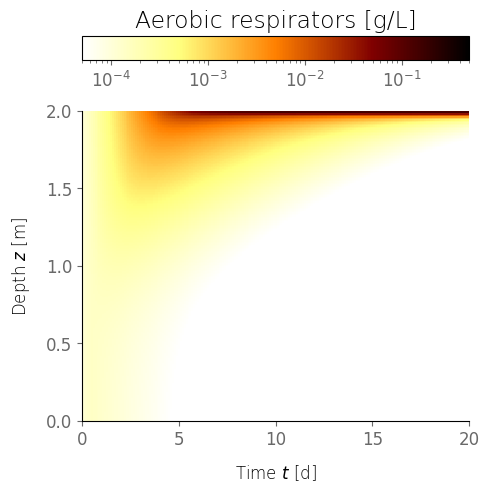

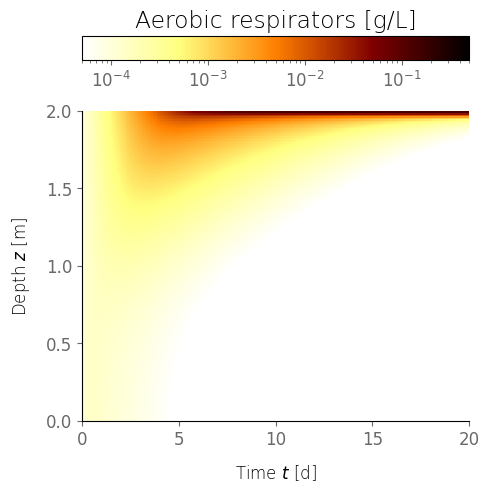

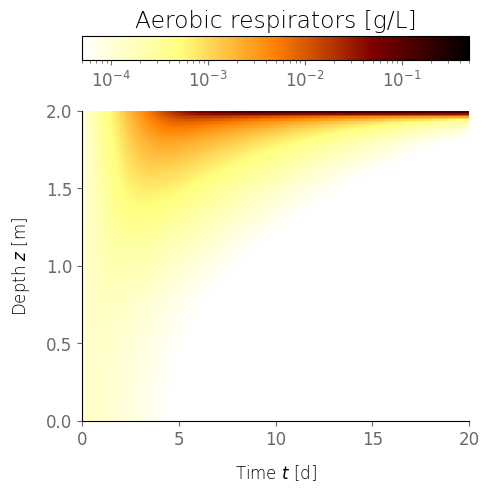

In [16]:
igt = 0

scalars = [of_old.read_field_all_times("XAR"), of_new.read_field_all_times("XAR"), of_newest.read_field_all_times("XAR")]

for scalar in scalars:
    fig, (cax, ax) = plt.subplots(
            2, 1, figsize=[5, 5], gridspec_kw={"height_ratios": [0.4, 5], "hspace":0.3}, sharex=False
        )

    img = ax.pcolormesh(
        scalar.t[igt:] / 86400, scalar.z, scalar[:, igt:], 
        cmap="afmhot_r",
        # norm=colors.LogNorm()
        norm=colors.LogNorm(vmin=5.0e-5, vmax=5e-1)
        # norm=colors.PowerNorm(gamma=1, vmin=0, vmax=0.005)
    )

    ax.set_ylim(0,2)
    ax.set_xlim(0, 20.01)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(4))

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    ax.set_xlabel("Time $t$ [d]")
    ax.set_ylabel("Depth $z$ [m]")
    plt.colorbar(img, cax=cax, orientation="horizontal")
    cax.set_title(r"Aerobic respirators [g/L]", fontdict=dict(weight=100))
    # fig.tight_layout()
    fig.set_facecolor(color="#FFFFFF00")
    plt.show()

# plt.savefig("PNG/XAR.png", dpi=400, bbox_inches="tight", pad_inches=0.1)

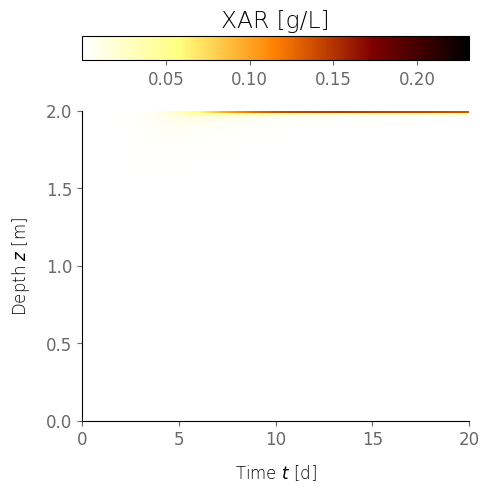

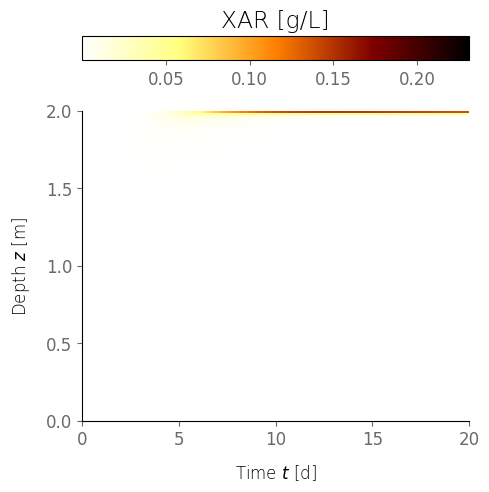

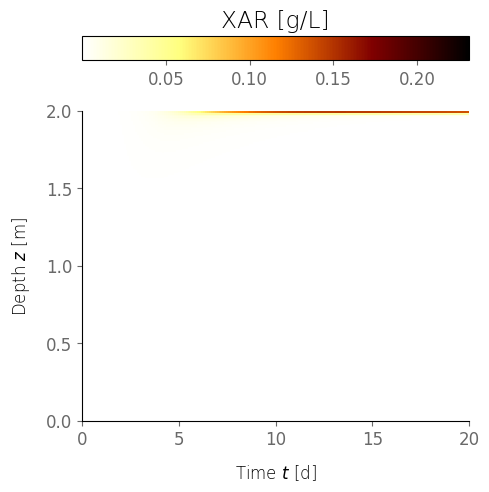

In [22]:
igt = 0

field = "XAR"
scalars = [of_old.read_field_all_times(field), of_new.read_field_all_times(field), of_newest.read_field_all_times(field)]

for scalar in scalars:
    fig, (cax, ax) = plt.subplots(
            2, 1, figsize=[5, 5], gridspec_kw={"height_ratios": [0.4, 5], "hspace":0.3}, sharex=False
        )

    img = ax.pcolormesh(
        scalar.t[igt:] / 86400, scalar.z, scalar[:, igt:], 
        cmap="afmhot_r",
        # vmin=0.002, vmax=0.009
        # norm=colors.LogNorm()
        # norm=colors.LogNorm(vmin=5.0e-5, vmax=5e-1)
        # norm=colors.PowerNorm(gamma=1, vmin=0, vmax=0.005)
    )

    ax.set_ylim(0,2)
    ax.set_xlim(0, 20.01)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(4))

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    ax.set_xlabel("Time $t$ [d]")
    ax.set_ylabel("Depth $z$ [m]")
    plt.colorbar(img, cax=cax, orientation="horizontal")
    cax.set_title(rf"{field} [g/L]", fontdict=dict(weight=100))
    # fig.tight_layout()
    fig.set_facecolor(color="#FFFFFF00")
    plt.show()

# plt.savefig("PNG/XAR.png", dpi=400, bbox_inches="tight", pad_inches=0.1)

In [ ]:
of.boundaryProbes_to_txt()
of.process_boundaryProbes()

In [ ]:
for bp in of.boundaryProbes:
    for k, v in bp.array_data.items():
        if k == "Uz": 
            fig, ax = plt.subplots(figsize=[6, 5])
            # ax.plot(v.time, v.values[0])
            ax.plot(v.time/86400, v.values[1], label="Top")
            ax.legend()
            # v.plot.line(x="time", ax=ax, lw=1)
            plt.show()

In [ ]:
of2 = OpenFOAM("ten_days_then_dry", "ten_days_then_dry")

In [ ]:
of2.foam_to_vtk()
total_biomass = {k:of2.read_field_all_times(k) for k in ["XAR", "XDN", "XN", "XI", "EPS", "O2"]}
total_biomass.keys()

In [ ]:
scalar = of2.read_field_all_times("Sw")

In [ ]:
igt = 0

from matplotlib.ticker import MaxNLocator

fig, (cax, ax) = plt.subplots(
        2, 1, figsize=[5, 5], gridspec_kw={"height_ratios": [0.4, 5], "hspace":0.3}, sharex=False
    )

img = ax.pcolormesh(
    scalar.t[igt:] / 86400 + 10, scalar.z, scalar[:, igt:], 
    cmap="afmhot_r",
    # norm=colors.LogNorm(vmin=1.0e-5, vmax=1e-1)
    # norm=colors.PowerNorm(gamma=1, vmin=0, vmax=0.005)
)

ax.set_ylim(0,2)
ax.set_xlim(10, 20.05)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_xlabel("Time $t$ [d]")
ax.set_ylabel("Depth $z$ [m]")
plt.colorbar(img, cax=cax, orientation="horizontal")
cax.set_title(r"$X_{\rm AR}$ [g/L]")
fig.tight_layout()
plt.show()

In [ ]:
of2.boundaryProbes_to_txt()
of2.process_boundaryProbes()

In [ ]:
for bp in of.boundaryProbes:
    for k, v in bp.array_data.items():
        if k == "Uz": 
            time_wet = v.time
            vel_wet = v.values[0]
            break


for bp in of2.boundaryProbes:
    for k, v in bp.array_data.items():
        if k == "Uz": 
            time_dry = v.time
            vel_dry = v.values[0]

cross_area = 5.026e-3
to_ml_per_min = 1000*1000*60

In [ ]:
plt.plot(time_dry.time.values/86400, -vel_dry*cross_area*to_ml_per_min)

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(vel_dry*cross_area*to_ml_per_min)
peaks

In [ ]:
mask = np.zeros_like(vel_dry, dtype=np.bool8)
mask[peaks] = True

filtered_vel_dry = np.ma.MaskedArray(vel_dry, mask=mask)

filtered_vel_dry

In [ ]:
%config InlineBackend.figure_formats = ['svg']

In [ ]:

fig, ax = plt.subplots(figsize=[5, 4.5])
ax.plot(time_wet/86400, -vel_wet*cross_area*to_ml_per_min, label="Always wet", lw=2, c="k")
ax.plot(time_dry/86400 + 10, -vel_dry*cross_area*to_ml_per_min, label="Alternate \ndry/wet", lw=1.5, c="#888888")
# ax.plot(time_dry[peaks]/86400 + 10, vel_dry[peaks]*cross_area*to_ml_per_min, "x")

# ax.plot(time_dry/86400 + 10, filtered_vel_dry*cross_area*to_ml_per_min, c="pink")

ax.legend(loc="lower left")
ax.set_ylim(0, 1.1)

ax.set_xlabel("Time [d]")
ax.set_ylabel("Flux out the column [mL/min]")
fig.set_facecolor("#FFFFFF00")
plt.savefig("PNG/wet and dry.svg")